# Tarea 1: Minería de Datos IIC2433
<hr/>

**Alumno:** 
- Francisca Leão Cerquinho Ribeiro da Fonseca 

    (**No. alumno** : 19410263)

**Fecha de Entrega**
17 de septiembre de 2019, 23:59 hrs

### Introducción

Esta tarea consiste en estudiar en profundidad e implementar el algoritmo FP-Growth Borgelt [2005], el cual tiene por objetivo encontrar itemsets frecuentes dentro de una base de datos y generar las reglas de asociaci ́on que superan umbrales de soporte y confianza. Posterior a la implementaci ́on, dicho algoritmo se someter ́a a prueba en la extracci ́on de informaci ́on en una base de datos real.


### Definitions

**Itemset:** Colección de uno o más ítems

**Soporte:** Frecuencia relativa que un itemset aparece en la base de datos. 
    Esto se calcula como el número itemset que aparece en la base de datos de compras dividido por el número total de compras (transacciones).
    
 **Itemset frecuente:** Un itemset que aparece en una frecuencia mayor a un umbral. El umbral está determinado por uno o bien viene dado.
 
 **Regla de asociación:** Es una expresión de la forma X -> Y Donde X e Y son itemsets
 
 **Confianza:** 

    Confianza(X -> Y) = Soporte(X,Y) / Soporte(X)

 **Lift:** Permite medir el incremento del lado derecho de la regla (consecuente) dada la compra del lado izquierdo (antecedente)
 Confianza de la regla dividido por el soporte del consecuente.

    Lift = confianza(X -> Y) / Soporte(Y)

**- Lift > 1:** La probabilidad del consecuente de la regla aumentó dado que el consumidor compró los ítems del antecedente

**- Lift = 1:** La probabilidad no se vio afectada, es decir, el consecuente no se ve influenciado por el antecedente

**- Lift < 1:** El antecedente tuvo un efecto negativo en la ocurrencia del consecuente, lo que baja su probabilidad


#### Cargar la base de datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

min_support = 4

database =  np.load('spotify.npy',allow_pickle=True)
data_base_array = database.item()

nr_arrays = 300 #len(data_base_array)


### Implementar el algoritmo FP-Growth

El diccionario **itemSupport**, tiene como clave el elemento y como valor el soporte de este elemento.
Así reviso todo mi conjunto de datos y veo cuántas veces encuentro cada elemento

In [2]:
## Obtenemos el support de cada item

itemsSupport = {}
table_vals = []
for i in range(nr_arrays):
    for item in data_base_array[i]:
        if item in itemsSupport:
            itemsSupport[item] = itemsSupport[item] + 1
        else:
            itemsSupport[item] = 1

for itemset, soporte in itemsSupport.items():
    row = [itemset,soporte]
    table_vals.append(row)
    
# Tabla con el total de support de cada item

col_labels = ['Item', 'Soporte']

df = pd.DataFrame(table_vals)
df.columns = col_labels
df.head(len(table_vals))


,Item,Soporte
0,Lose Control (feat. Ciara & Fat Man Scoop),3
1,Toxic,5
2,Crazy In Love,8
3,Rock Your Body,4
4,It Wasn't Me,6
5,Yeah!,11
6,My Boo,1
7,Buttons,3
8,Say My Name,8
9,Hey Ya! - Radio Mix / Club Mix,8


Elimino elementos del diccionario **itemsSupport** que no tienen el soporte mínimo deseado (variable **min_support**) y clasifico por orden decreciente

In [3]:
## Eliminamos elementos que no tienen el soporte mínimo deseado

itemsSupport = {key:val for key, val in itemsSupport.items() if val >= min_support}

#items ordenados

itemsSupport = dict(sorted(itemsSupport.items() ,  key=lambda x: -x[1]))

# Tabla con los items ordenados que tienen el support mínimo deseado
table_vals_supMin = []

for itemset, soporte in itemsSupport.items():
    row = [itemset,soporte]
    table_vals_supMin.append(row)
    
col_labels = ['Item c/ soporte min deseado', 'Soporte']

df = pd.DataFrame(table_vals_supMin)
df.columns = col_labels

df.head(len(table_vals_supMin))

,Item c/ soporte min deseado,Soporte
0,Closer,22
1,Roses,17
2,Stronger,16
3,Ride,16
4,HUMBLE.,16
5,One Dance,16
6,Broccoli (feat. Lil Yachty),15
7,Mercy,15
8,Waves,15
9,Sorry,14


Para todo mi conjunto de datos, reviso cada conjunto de elementos y elimino los elementos que no tienen el soporte mínimo deseado.

Entonces creé dos funciones:

**- deleteArrayElements:** elimina elementos de todo el conjunto de elementos que no tienen el soporte mínimo deseado.

**- sortArrayElement:** ordena el conjunto de datos (L) en orden descendente

In [4]:
## Se encuentra el itemset ordenado basado en L (no en la columna itemset)

## - 1: eliminar elementos del array que no aparecen en el diccionario

def deleteArrayElements(array):
    new_array = []
    for i in range(len(array)):
        elem = array[i]
        if elem in itemsSupport:
            new_array.append(elem)
    return new_array

## - 2: ordenar elementos del array de forma descendente

def sortArrayElement(array):
    for i in range(len(array)):
        for j in range(i+1,len(array)):
            if(itemsSupport[array[i]] < itemsSupport[array[j]]):
                temp = array[i]
                array[i] = array[j]
                array[j] = temp
    return array

# itemset ordenado

new_data_base_array = []

for i in range(nr_arrays):
    new_array = deleteArrayElements(data_base_array[i])
    new_array = sortArrayElement(new_array)
    if len(new_array) != 0:
        new_data_base_array.append(new_array)

# Tabla con los itemsets ordenados que tienen el support mínimo deseado

tabla_itemsets_ordenado = []

for itemset in new_data_base_array:
    item = ' , '.join(itemset)
    tabla_itemsets_ordenado.append(item)


col_labels = ['Itemset Ordenado']

df = pd.DataFrame(tabla_itemsets_ordenado)
df.columns = col_labels
df.head(len(tabla_itemsets_ordenado))

,Itemset Ordenado
0,"Closer , Party In The U.S.A. , Forever , Yeah!..."
1,"Eye of the Tiger , Bohemian Rhapsody - Remaste..."
2,"Weak , Sweet Emotion , Two Weeks , Push"
3,"Stay , Angel , Wonderwall - Remastered , I Don..."
4,"Party In The U.S.A. , Yeah! , Forever , Thinki..."
5,"Chandelier , Elastic Heart , Zombie"
6,"Latch , Selfish , Selfish , Feels , Jungle , H..."
7,"Lay Me Down , Red Red Wine - Edit , Tongue Tied"
8,"goosebumps , oui , No Flockin , T-Shirt , Go F..."
9,"Closer , Smile , No Love , Wildfire , You , Wi..."


### Construcción del árbol

Para encontrar toda mi Conditional Pattern Base,, revisé mi **itemsSupport** y para cada item percorri cada conjunto de items(itemset) para encontrar la Conditional pattern base de ese item y la cantidad de veces que aparece.

Lo guardé en un diccionario **conditionalPattern_array**:

**conditionalPattern_array {**

**'item':** [

    {'pattern': 3},
    
    {'pattern2': 1},
    
    ],

    .... 

**}**

In [50]:
## Construcción del árbol

conditionalPattern_array = {}

def returnPattern_stringIndex(pattern_string, list_patterns):
    for i in range(len(list_patterns)):
        for key,value in list_patterns[i].items():
            if key == pattern_string:
                return i

# Pasar por todos los elementos de itemsSupport y encontrar su "Conditional pattern"
# La estructura es un diccionario, donde la clave es el elemento y el valor es una lista de diccionarios
    # este diccionario tiene como clave el "Conditional pattern" y como valor el número de veces que tenemos esa
        #"Conditional pattern"
for item in itemsSupport:
    dict_item = {}
    list_patterns = []
    
    for i in range(len(new_data_base_array)):
        itemset = new_data_base_array[i]
        if item in itemset:
            #cortar el array del conjunto de elementos para indexar donde aparece el elemento
            index = itemset.index(item)
            pattern = itemset[0:index]
            pattern_string = ','.join(pattern)
            pattern_dictionary = {}
            if len(list_patterns) != 0 and len(pattern) != 0:  
                #ver si ya encontramos este patrón 
                if any(pattern_string in x for x in list_patterns):
                    index = returnPattern_stringIndex(pattern_string, list_patterns)
                    list_patterns[index][pattern_string] = list_patterns[index][pattern_string] + 1
                else:
                    pattern_dictionary[pattern_string] = 1
                    list_patterns.append(pattern_dictionary)
            else:
                if  len(pattern) != 0:
                    pattern_dictionary[pattern_string] = 1
                    list_patterns.append(pattern_dictionary)
    conditionalPattern_array[item]=list_patterns

# Tabla con los itemsets ordenados y su conditional pattern

tabla_itemsets_ordenado = []

for itemset,patterns in conditionalPattern_array.items():
    support = ''
    for pattern in patterns:
        for pat,value in pattern.items():
            item = '{'+pat+':'+str(value)+'}, '
            support = support + item
    if support == '':
        col = [itemset,'-']
        tabla_itemsets_ordenado.append(col)
    else: 
        col = [itemset,support[:-2]]
        tabla_itemsets_ordenado.append(col)
    
col_labels = ['Itemset Ordenado', 'Conditional pattern base']

df = pd.DataFrame(tabla_itemsets_ordenado)
df.columns = col_labels
df.head(len(tabla_itemsets_ordenado))

,Itemset Ordenado,Conditional pattern base
0,Closer,-
1,Roses,"{Closer:3}, {Closer,Closer:1}"
2,Stronger,"{HUMBLE.:2}, {Roses:2}, {Ride,One Dance,Ride:1..."
3,Ride,"{Closer:1}, {Closer,One Dance:1}, {HUMBLE.:1}"
4,HUMBLE.,"{Ride:1}, {Ride,One Dance,Ride,Stronger:1}, {R..."
5,One Dance,"{Closer,Roses:1}, {Ride:1}, {Closer,Closer,Ros..."
6,Broccoli (feat. Lil Yachty),"{HUMBLE.,Stronger:1}, {Roses,Stronger,Mercy:1}..."
7,Mercy,"{Roses,Stronger:1}, {Roses:1}, {Stronger,Waves..."
8,Waves,"{Closer:1}, {HUMBLE.:2}, {HUMBLE.,Broccoli (fe..."
9,Sorry,"{Roses:2}, {Closer,Roses:1}, {Closer,Waves:1},..."


Busque el conditional FP-Tree, buscando elementos comunes en el itemset del conditional pattern base.
Para hacer esto, revisé mi conditionalPattern_array y para cada elemento, su lista de base de patrón condicional y 
comprobé cuáles eran los patrones comunes y con qué frecuencia aparecían en mi lista de conditional pattern base.

El resultado se almacenó en un diccionario **dict_itemsComunes**, que tiene la siguiente estructura:

**dict_itemsComunes {**

**'item':** [

    {'pattern': 3},
    
    {'pattern2': 1},
    
    ],

    .... 

**}**

**--->  VER O QUE SE PASSA CONDICIONAL PATTERN NAO PODEM TER VALOR E NAO ESTA A ENCONTRAR DIREITO**

In [57]:
#  buscar los items comunes en itemset de conditional pattern base

def findCommonElem(a, b):
    array = []
    if len(a) >= len(b):
        length = len(b)
    else:
        length = len(a)
    for i in range(length):
        if a[i] == b[i]:
            array.append(a[i])
        else:
            return array
    return array

dict_itemsComunes = {}
for item,listpatterns in conditionalPattern_array.items():
    dict_itemElemCommon = {}
    for k in range(len(listpatterns)):
        elemK = list(listpatterns[k].keys())[0]
        elemK = elemK.split(',')
        for j in range(k+1,len(listpatterns)):
            elemJ = list(listpatterns[j].keys())[0]
            elemJ = elemJ.split(',')
            common = findCommonElem(elemK,elemJ)
            common = ','.join(common)
            if len(common) != 0: 
                if common in dict_itemElemCommon:
                    dict_itemElemCommon[common] = dict_itemElemCommon[common] + 1
                else:
                    dict_itemElemCommon[common] = 1
                   
    dict_itemsComunes[item] = dict_itemElemCommon
# Tabla con los items comunes en itemset de conditional pattern base


tabla_itemSetsCommons = []
for item,itemsCommons in dict_itemsComunes.items():
    row = []
    row.append(item)
    patterns = conditionalPattern_array[item]
    support = ''
    for pattern in patterns:
        for pat,value in pattern.items():
            item = '{'+pat+':'+str(value)+'}, '
            support = support + item
    if support == '':
        row.append('-')
    else: 
        row.append(support[:-2])
    support = ''
    if bool(itemsCommons) == False:
        row.append('-')
    else:
        for pat,value in itemsCommons.items():
            item = '{'+pat+':'+str(value)+'}, '
            support = support + item
        row.append(support[:-2])
    tabla_itemSetsCommons.append(row)
    

col_labels = ['Itemset Ordenado', 'Conditional pattern base', 'Conditional FP-Tree']

df = pd.DataFrame(tabla_itemSetsCommons)
df.columns = col_labels
df.head(len(tabla_itemSetsCommons))


,Itemset Ordenado,Conditional pattern base,Conditional FP-Tree
0,Closer,-,-
1,Roses,"{Closer:3}, {Closer,Closer:1}",{Closer:1}
2,Stronger,"{HUMBLE.:2}, {Roses:2}, {Ride,One Dance,Ride:1...",-
3,Ride,"{Closer:1}, {Closer,One Dance:1}, {HUMBLE.:1}",{Closer:1}
4,HUMBLE.,"{Ride:1}, {Ride,One Dance,Ride,Stronger:1}, {R...",{Ride:1}
5,One Dance,"{Closer,Roses:1}, {Ride:1}, {Closer,Closer,Ros...","{Closer:3}, {Roses:1}"
6,Broccoli (feat. Lil Yachty),"{HUMBLE.,Stronger:1}, {Roses,Stronger,Mercy:1}...","{HUMBLE.:3}, {Roses:3}"
7,Mercy,"{Roses,Stronger:1}, {Roses:1}, {Stronger,Waves...","{Roses:1}, {Stronger:1}"
8,Waves,"{Closer:1}, {HUMBLE.:2}, {HUMBLE.,Broccoli (fe...",{HUMBLE.:1}
9,Sorry,"{Roses:2}, {Closer,Roses:1}, {Closer,Waves:1},...","{Roses:6}, {Closer:9}, {Closer,Roses:1}"


Finalmente, el patrón frecuente se busca utilizando la columna Items y Condicional FP-Tree.

Para hacer esto, revisé mis dict_itemsComunes y agregué mi artículo al final del conditionalFP-Tree.

La estructura se almacenó en un diccionario **dict_frequent_pattern**:

**dict_frequent_pattern {**

**'item':** [

    {'frequent_pattern': 3},
    
    {'frequent_pattern2': 1},
    
    ],

    .... 

**}**

In [58]:
#Finalmente se buscan los frequent pattern usando la columna Items y Conditional FP-Tree
# dict_itemsComunes -> Conditional PF-Tree
# itemsSupport -> columna Items


dict_frequent_pattern = {}
for itemset, listpatterns in dict_itemsComunes.items():
    dict_item_frequent_pattern = {}
    for pattern, value in listpatterns.items():
        split = pattern.split(",")
        new_pattern = pattern + ',' + itemset
        dict_item_frequent_pattern[new_pattern] = value
        for item in split:
            new_pattern = item + ',' +  itemset
            dict_item_frequent_pattern[new_pattern] = value
    if len(listpatterns) > 0:
        dict_frequent_pattern[itemset]=dict_item_frequent_pattern

# Tabla con los itemset más frecuentes (dict_frequent_pattern) (itemsSupport + dict_itemsComunes)

tabla_itemsets_moreFreq = []
for itemset,freqPatterns in dict_frequent_pattern.items():
    freqPatternsString = ''
    for pattern,value in freqPatterns.items():
        freqPatternsString = freqPatternsString + '<' + pattern + ':' + str(value) + '> '
    tabla_itemsets_moreFreq.append([itemset,freqPatternsString])
            

col_labels = ['Frequence pattern', 'Soporte']

df = pd.DataFrame(tabla_itemsets_moreFreq)
df.columns = col_labels
df.head(len(tabla_itemsets_moreFreq))



,Frequence pattern,Soporte
0,Roses,"<Closer,Roses:1>"
1,Ride,"<Closer,Ride:1>"
2,HUMBLE.,"<Ride,HUMBLE.:1>"
3,One Dance,"<Closer,One Dance:3> <Roses,One Dance:1>"
4,Broccoli (feat. Lil Yachty),"<HUMBLE.,Broccoli (feat. Lil Yachty):3> <Roses..."
5,Mercy,"<Roses,Mercy:1> <Stronger,Mercy:1>"
6,Waves,"<HUMBLE.,Waves:1>"
7,Sorry,"<Roses,Sorry:1> <Closer,Sorry:1> <Closer,Roses..."
8,Work from Home,"<Roses,Work from Home:1> <Closer,Work from Hom..."
9,Don't Let Me Down,"<Roses,Don't Let Me Down:6> <Closer,Don't Let ..."


Ahora agregué mis itemsSupport con mi dict_frequent_pattern para encontrar los conjuntos de artículos más frecuentes
La estructura se almacenó en un diccionario **itemset_freq**:

**itemset_freq {**

    'frequent_pattern1': 3,

    'frequent_pattern2': 3,
    
    'frequent_pattern3': 1,
    

    .... 

**}**

In [59]:
# Los itemset más frecuentes son: (itemsSupport + dict_frequent_pattern)

itemset_freq = {}
for itemset, dicts in dict_frequent_pattern.items():
    for pattern,value in dicts.items():
        itemset_freq[pattern]=value

for itemset,support in itemsSupport.items():
    itemset_freq[itemset] = support
    
# Tabla con los itemset más frecuentes (itemsSupport + dict_frequent_pattern)

tabla_itemsets_moreFreq = []
for itemset,freqPatterns in itemset_freq.items():
    tabla_itemsets_moreFreq.append([itemset,freqPatterns])
            
col_labels = ['Frequence pattern', 'Soporte']

df = pd.DataFrame(tabla_itemsets_moreFreq)
df.columns = col_labels
df.head(len(tabla_itemsets_moreFreq))

,Frequence pattern,Soporte
0,"Closer,Roses",1
1,"Closer,Ride",1
2,"Ride,HUMBLE.",1
3,"Closer,One Dance",3
4,"Roses,One Dance",1
5,"HUMBLE.,Broccoli (feat. Lil Yachty)",3
6,"Roses,Broccoli (feat. Lil Yachty)",3
7,"Roses,Mercy",1
8,"Stronger,Mercy",1
9,"HUMBLE.,Waves",1



### Aplicar el algoritmo a la base de datos entregada y filtrar las mejores 10 reglas de acuerdo a dos criterios de calidad definidos 


In [67]:
# Encontrando las reglas de asociación

### Function that creates all unique and different combinations of an array of elements
def join(singular_itemsets, comb):    
    comb = []
    for i in singular_itemsets:
        for j in singular_itemsets:
            if [i,j] not in comb and [j,i] not in comb and i != j:
                if isinstance(i, list): 
                    len_combination = len(i)-1
                    if(i[:len_combination] == j[:len_combination]):
                        in_first = set(i)
                        in_second = set(j)
                        in_second_but_not_in_first = in_second - in_first
                        finalList = list(in_first) + list(in_second_but_not_in_first)
                        if len(comb) > 1:
                            exists = False
                            for elem in comb:
                                checklist = set(finalList) - set(elem)
                                if set(finalList) == set(elem):
                                    exists = True
                            if exists is False:
                                comb.append(finalList)
                            
                        else:
                            comb.append(finalList)
                else:
                    comb.append( [i,j] )

    return comb

dict_itemsets_conf_sup = {}
table_vals = []
max_value = max(itemset_freq.values())
arrayOfTuples = []
for itemset, support in itemset_freq.items():
    if itemset.find(','):
        split = itemset.split(',')
        #Hacer todas las combinaciones posibles para calcular la confianza de cada itemset
        combinations = join(split,[])
       # print('combinations',combinations)
        #Para cada combinación calcular la confianza y agregar al diccionario dict_itemsets_confidence
        for comb in combinations:
            aux_X = set(split)-set(comb)
            if len(aux_X) > 0:
                X = ''.join(aux_X)
                Y = ','.join(comb)
               
                # Calcular el soporte y la confianza de cada itemset_freq
                if Y not in itemset_freq:
                    supportXY = itemset_freq[itemset] / max_value
                    if X not in itemset_freq:
                        confidence = 0
                    lift = 0
                else:
                    if X not in itemset_freq:
                        supportXY = itemset_freq[itemset] / max_value
                        supportY = itemset_freq[Y] / max_value
                        confidence = 0
                        lift = confidence / supportY
                    else:
                        supportXY = itemset_freq[itemset] / max_value
                        supportX = itemset_freq[X] / max_value
                        supportY = itemset_freq[Y] / max_value
                        confidence = supportXY / supportX
                        lift = confidence / supportY
                    
                string = X + ' -> ' + Y
                arrayOfTuples.append((X,Y))
                conf_sup = str(round(supportXY,3)) + ',' + str(round(confidence,3)) + ',' + str(round(lift,3))
                dict_itemsets_conf_sup[string] = conf_sup
                if confidence != 0 and lift != 0:
                    col = [string, str(round(supportXY,3)),str(round(confidence,3)),str(round(lift,3))]
                    table_vals.append(col)
                else:
                    if confidence == 0:
                        col = [string,supportXY,'-',str(round(lift,3))]
                        table_vals.append(col)
                    else:
                        col = [string,supportXY,confidence,'-']
                        table_vals.append(col)
                
# Tabla con soporte y valores de confianza

col_labels = ['Frequent Itemsets', 'Soporte', 'Confianza', 'Lift']

df = pd.DataFrame(table_vals)
df.columns = col_labels
df.head(len(table_vals))


,Frequent Itemsets,Soporte,Confianza,Lift
0,"Sorry -> Closer,Roses",0.045,0.071,1.571
1,"Roses -> Closer,Sorry",0.045,0.059,1.294
2,"Closer -> Roses,Sorry",0.045,0.045,1.0
3,"Work from Home -> Roses,One Dance",0.045,0.071,1.571
4,"One Dance -> Roses,Work from Home",0.045,0.062,1.375
5,"Roses -> One Dance,Work from Home",0.045,0.059,1.294
6,"Ni**as In Paris -> HUMBLE.,Waves",0.045,0.077,1.692
7,"Waves -> HUMBLE.,Ni**as In Paris",0.045,0.067,1.467
8,"HUMBLE. -> Waves,Ni**as In Paris",0.045,0.062,1.375
9,"Congratulations -> HUMBLE.,Waves",0.045,0.077,1.692


In [76]:
#Filtrar las mejores 10 reglas de acuerdo a dos criterios de calidad definidos 

def top10ReglasSupConfLift(dict_itemsets_conf_sup,support, confidence, lift):
    dict_aux = {}
    for item,value in dict_itemsets_conf_sup.items():
        conf_sup = value.split(',')
        if float(conf_sup[0]) >= support and float(conf_sup[1]) >= confidence and float(conf_sup[2]) >= lift:
            dict_aux[item] = conf_sup[1]
    list_aux = sorted(dict_aux.items(), key=lambda kv: kv[1], reverse=True)
    top10 = [i[0] for i in list_aux]
    
    return top10[:10]


desiredSupport = 0.045
desiredConfidence = 0.001
desiredLift = 1
top10SupConfLift = top10ReglasSupConfLift(dict_itemsets_conf_sup,desiredSupport,desiredConfidence, desiredLift)

#Tabla
top10SupConfLift_tabla = []
for regla in top10SupConfLift:
    value = dict_itemsets_conf_sup[regla]
    conf_sup = value.split(',')
    conf_sup.insert(0,regla)
    top10SupConfLift_tabla.append(conf_sup)

if len(top10SupConfLift_tabla) == 0:
    print ('No existen 10 associaciónes para soporte >= {}, confianza > = {} y lift >= {}'.format(desiredSupport,desiredConfidence, desiredLift))
else:
    print("Las 10 mejores reglas de asociación para soporte >= {}, confianza > = {} y lift >= {},\n seleccionando los 10 elementos con el valor de confianza más alto:"
          .format(desiredSupport,desiredConfidence,desiredLift))

    col_labels_top10 = ['Top10 p/ suporte >= {}, confianza > = {} y lift >= {}'.format(desiredSupport,desiredConfidence,desiredLift),'Soporte','Confianza','Lift']
    dfTop10SupConfLift = pd.DataFrame(top10SupConfLift_tabla)
    dfTop10SupConfLift.columns = col_labels_top10
    
dfTop10SupConfLift.head(len(top10SupConfLift_tabla))

Las 10 mejores reglas de asociación para soporte >= 0.045, confianza > = 0.001 y lift >= 1,
 seleccionando los 10 elementos con el valor de confianza más alto:


,"Top10 p/ suporte >= 0.045, confianza > = 0.001 y lift >= 1",Soporte,Confianza,Lift
0,"Drunk On You -> Cruise,Crash My Party",0.136,0.429,3.143
1,"pick up the phone -> HUMBLE.,Broccoli (feat. L...",0.091,0.333,2.444
2,No Problem (feat. Lil Wayne & 2 Chainz) -> HUM...,0.091,0.333,2.444
3,"Cruise -> Drunk On You,Crash My Party",0.136,0.333,2.444
4,"Higher -> Roses,Sorry",0.045,0.25,5.5
5,"YOUTH -> Closer,Roses",0.045,0.25,5.5
6,"All We Know -> Closer,Roses",0.045,0.25,5.5
7,"Fight Night -> HUMBLE.,Waves",0.045,0.25,5.5
8,"Still Here -> HUMBLE.,Broccoli (feat. Lil Yachty)",0.045,0.25,1.833
9,"One Night -> HUMBLE.,Broccoli (feat. Lil Yachty)",0.045,0.25,1.833


In [77]:
#Filtrar las mejores 10 reglas de acuerdo a dos criterios de calidad definidos 

def top10Reglas(dict_itemsets_conf_sup,support, confidence):
    dict_aux = {}
    for item,value in dict_itemsets_conf_sup.items():
        conf_sup = value.split(',')
        if float(conf_sup[0]) >= support and float(conf_sup[1]) >= confidence:
            dict_aux[item] = conf_sup[1]
    list_aux = sorted(dict_aux.items(), key=lambda kv: kv[1], reverse=True)
    top10 = [i[0] for i in list_aux]
    
    return top10[:10]


desiredSupport = 0.045
desiredConfidence = 0.001

top10 = top10Reglas(dict_itemsets_conf_sup,desiredSupport,desiredConfidence)

#Tabla
top10_tabla = []
for regla in top10:
    value = dict_itemsets_conf_sup[regla]
    conf_sup = value.split(',')
    conf_sup.insert(0,regla)
    top10_tabla.append(conf_sup)

if len(top10) == 0:
    print ('No existen 10 associaciónes para soporte >= {} y confianza > = {}'.format(desiredSupport,desiredConfidence))
else:
    print("Las 10 mejores reglas de asociación para soporte >= {} y confianza > = {},\n seleccionando los 10 elementos con el valor de confianza más alto:"
          .format(desiredSupport,desiredConfidence))

    col_labels_top10 = ['Top10 p/ suporte >= {} y confianza >= {}'.format(desiredSupport,desiredConfidence),'Soporte','Confianza','Lift']
    dfTop10 = pd.DataFrame(top10_tabla)
    dfTop10.columns = col_labels_top10
    
dfTop10.head(len(top10))

Las 10 mejores reglas de asociación para soporte >= 0.045 y confianza > = 0.001,
 seleccionando los 10 elementos con el valor de confianza más alto:


,Top10 p/ suporte >= 0.045 y confianza >= 0.001,Soporte,Confianza,Lift
0,"Drunk On You -> Cruise,Crash My Party",0.136,0.429,3.143
1,"pick up the phone -> HUMBLE.,Broccoli (feat. L...",0.091,0.333,2.444
2,No Problem (feat. Lil Wayne & 2 Chainz) -> HUM...,0.091,0.333,2.444
3,"Cruise -> Drunk On You,Crash My Party",0.136,0.333,2.444
4,"Higher -> Roses,Sorry",0.045,0.25,5.5
5,"YOUTH -> Closer,Roses",0.045,0.25,5.5
6,"All We Know -> Closer,Roses",0.045,0.25,5.5
7,"Fight Night -> HUMBLE.,Waves",0.045,0.25,5.5
8,"Still Here -> HUMBLE.,Broccoli (feat. Lil Yachty)",0.045,0.25,1.833
9,"One Night -> HUMBLE.,Broccoli (feat. Lil Yachty)",0.045,0.25,1.833



###  Explicar las reglas obtenidas.


### Visualizar las reglas

plot(dfTop10, measure = c("support", "lift"), shading = "confidence")

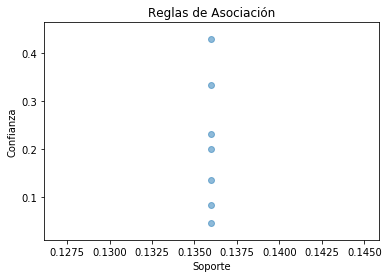

In [63]:
import random
import matplotlib.pyplot as plt

support_aux = list(dfTop10['Soporte'])
support = list(np.float_(support_aux))

confidence_aux= list(dfTop10['Confianza'])
confidence= list(np.float_(confidence_aux))

plt.title('Reglas de Asociación')
plt.scatter(support, confidence,   alpha=0.5)
plt.xlabel('Soporte')
plt.ylabel('Confianza') 
plt.show()



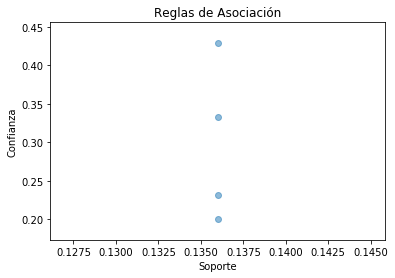

In [64]:
import random
import matplotlib.pyplot as plt

support_aux = list(dfTop10SupConfLift['Soporte'])
support = list(np.float_(support_aux))

confidence_aux= list(dfTop10SupConfLift['Confianza'])
confidence= list(np.float_(confidence_aux))

plt.title('Reglas de Asociación')
plt.scatter(support, confidence,   alpha=0.5)
plt.xlabel('Soporte')
plt.ylabel('Confianza') 
plt.show()


<hr/>
<center> <h2>Fin del Tarea.</h2> </center>
<center> <h3>Minería de Datos</h3> </center>
<center> <h4>Francisca Leão Cerquinho Ribeiro da Fonseca</h4> </center>
​